In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.interpolate import griddata

In [7]:
def K_neighbor(y, Y, k=10):
    if y < round(k/2):
        Y_sample = Y[0:k]
    elif y+round(k/2) > len(Y):
        Y_sample = Y[-k:]
    else:
        Y_sample = Y[y-(round(k/2)):y+(round(k/2))]
    # print(f'{x}  {X[x]}')
    # print(X_sample)

    return Y_sample

In [2]:
def expected_val_func(X, Y, k):
    Y_expected = np.zeros_like(X)
    for i in range(len(X)):
        Y_expected[i] = np.mean(K_neighbor(i, Y, k))

    return Y_expected, k

In [9]:
def plot_overlayed(X, Y, Y_expected, Y_hat, k):
    # create a scatter plot of X and Y and then add line graph of expected_val_func(X, Y)
    plt.figure(figsize=(10, 6))
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot and Linear Regression Line')

    # Add a scatter plot
    plt.scatter(X, Y, color='blue', label='Data Points')

    # Add a line graph with the same x but different y values
    plt.plot(X, Y_hat, color='red', label='Linear Regression Line')
    plt.plot(X, Y_expected, color='red', label=f'K-nearest-neighbor Regression Line k={k}')
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [76]:
# SORTING THE Ys AND Xs

# Step 1: Split X into two feature lists
x1 = X[0].tolist()
x2 = X[1].tolist()
y = Y.tolist()
y_hat = Y_hat.tolist()

# Step 2: Zip them together to keep association
combined = list(zip(x1, x2, y, y_hat))

# Step 3: Sort them (e.g., by x1)
combined_sorted = sorted(combined, key=lambda t : t[0])

# Step 4: Unzip back to separate lists
x1_sorted, x2_sorted, y_sorted, y_hat_sorted = zip(*combined_sorted)

In [4]:
def beta_estimate_demonstration(X, Y, num_points = 100):
    beta_1_estimates = np.linspace(start = -100, stop = 100, num = num_points, endpoint = True)
    beta_0_estimates = np.linspace(start = -100, stop = 100, num = num_points, endpoint = True)
    RSS = np.zeros((100, 100))
    Y_hat = np.zeros_like(beta_0_estimates)
    for i in range(num_points):
        for j in range(num_points):
            Y_hat = beta_0_estimates[j] + beta_1_estimates[i]*X
            RSS[i, j] += np.sum((Y-Y_hat)**2)

    beta_grid = np.meshgrid(beta_0_estimates, beta_1_estimates)
    return RSS, beta_grid

In [60]:
def MSE(Y_hat, Y):
  mse = 0
  for y_h, y in zip(Y_hat, Y):
    mse += (y - y_h)**2
  return mse*1/len(Y)

In [47]:
class Linear_model:
  def __init__(self):
    pass

  # X of shape (n, m) with m observations, Y with shape (m)
  def linear_regression_train(self, X_batch, Y_batch):
    y_bar = np.mean(Y_batch)
    X_bar = np.zeros(X_batch.shape[0]) # shape(n)
    self.Beta = np.zeros_like(X_bar)
    # caculating beta_1 and beta_0
    for n in range(X_batch.shape[0]):
      B1_numerator, B1_denominator = 0, 0
      x_bar = np.mean(X_batch[n, :])
      for m in range(X_batch.shape[1]):
          B1_numerator  += (X_batch[n][m] - x_bar)*(Y_batch[m] - y_bar)
          B1_denominator += (X_batch[n][m] - x_bar)**2
      self.Beta[n] = B1_numerator / B1_denominator
      X_bar[n] = x_bar
    self.beta_hat_0 = y_bar - np.dot(self.Beta,X_bar)
    # make predictions and print residual sum of squares

  def prediction(self, X, Y):
    Y_hat = np.zeros_like(Y)
    res_sum_sq = 0
    for i in range(Y.shape[0]):
      Y_hat[i] = self.beta_hat_0 + np.dot(X[:, i].T, self.Beta)
    for i in range(Y.shape[0]):
      res_sum_sq += (Y[i] - Y_hat[i])**2
    print(f'Final Residual Sum of Squares: {res_sum_sq}')
    return Y_hat

In [32]:
def test_train_split(X, Y, batch_size):
  # X_batch = np.zeros((X.shape[0], batch_size))
  # Y_batch = np.zeros(batch_size)
  # for i in range(batch_size):

  #   n = random.randint(0, X.shape[1]-1)
  #   X_batch[:,i] = X[:,n]
  #   Y_batch[i] = Y[n]
  indices = np.random.choice(X.shape[1], batch_size, replace=False)
  X_batch = X[:, indices]
  Y_batch = Y[indices]
  return X_batch, Y_batch

In [31]:
X.shape

(1, 30)

In [50]:
# generate Data
m = 30 # total number of observations will be m^n
n = 1
std_noise = 0.1 # standard deviation of noise
set_betas = np.array([2]) # secret betas not known by the model

X_axes = []
for dims in range(n):
  X_axes.append(np.linspace(1,m,m))
mesh = np.meshgrid(*X_axes, indexing='ij')
X_axes = []
for l in range(0,len(mesh)):
  X_axes.append(mesh[l].flatten())
X = np.stack(X_axes, axis=0)
Y = np.zeros(X.shape[1])
for obs in range(Y.shape[0]):
  Y[obs] = np.dot(X[:,obs].T, set_betas) +(random.randint(-10,10)*std_noise)

In [63]:
X_batch, Y_batch = test_train_split(X, Y, 30)

In [64]:
lr = Linear_model()
lr.linear_regression_train(X_batch, Y_batch)

In [65]:
Y_hat = lr.prediction(X, Y)

Final Residual Sum of Squares: 10.1642536151279


In [66]:
print(MSE(Y, Y_hat))
print(lr.Beta)

0.33880845383759667
[1.99681869]


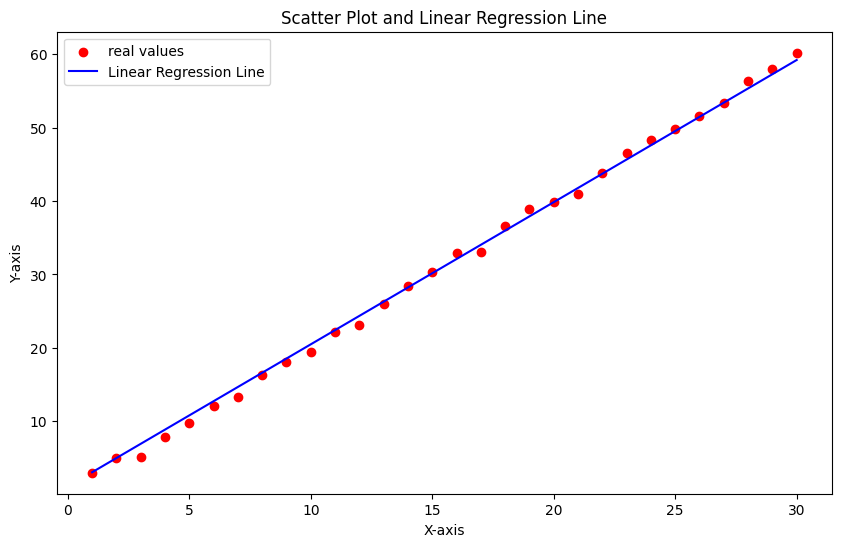

In [58]:
plt.figure(figsize=(10, 6))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot and Linear Regression Line')

# Add a line graph with the same x but different y values
plt.scatter(X[0], Y, color='red', label='real values')
plt.plot(X[0], Y_hat, color='blue', label='Linear Regression Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [10]:
# Convert to arrays if they aren't already

# Create grid
grid_x1, grid_x2 = np.meshgrid(
    np.linspace(X[0].min(), X[0].max(), 100),
    np.linspace(X[1].min(), X[1].max(), 100)
)

# Interpolate Y to create a smooth surface
grid_y = griddata((X[0], X[1]), Y, (grid_x1, grid_x2), method='cubic')

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# # Plot true Y surface
ax.plot_surface(grid_x1, grid_x2, grid_y, cmap='viridis', alpha=0.7, edgecolor='none')

# Plot Y_hat as scatter points
ax.scatter(X[0], X[1], Y_hat, color='red', label='Y_hat', s=10)
# ax.scatter(x1, x2, y, color='blue', label='Y_hat', s=10)

# Labels and title
ax.set_title('True Surface with Y_hat Scatter')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y / Y_hat')
ax.legend()

plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1